# Abstract

## This notebook includes: a sample of clean and dirty data, heart rate analysis with noise removal (optional), Bayevsky stress index, prediction of ECG signal behavior

# Heartbeat data analysis and plots

In [2]:
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample
import neurokit2 as nk

sample_rate = 360

cleardata = hp.get_data('e0110.csv')
dirtydata = hp.get_data('118e24.csv')
annotations = hp.get_data('118e24_ann.csv')

## prepare for analysis

### let's look at our data at different points in time

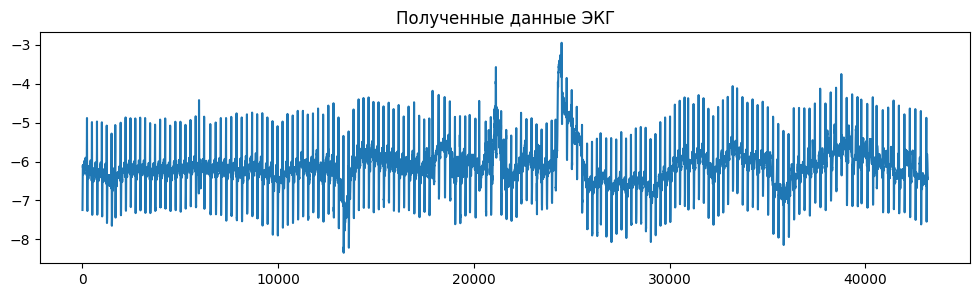

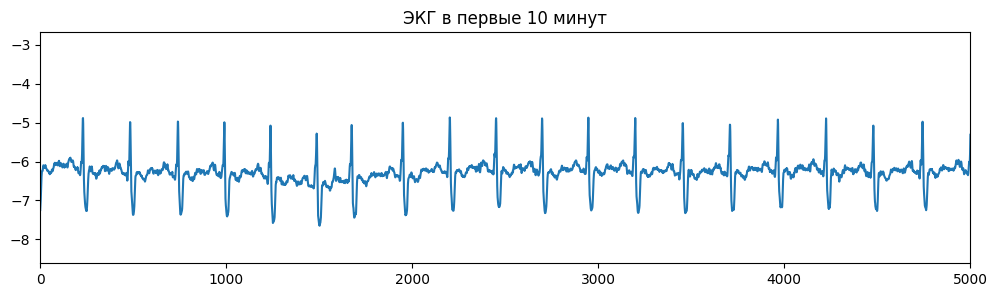

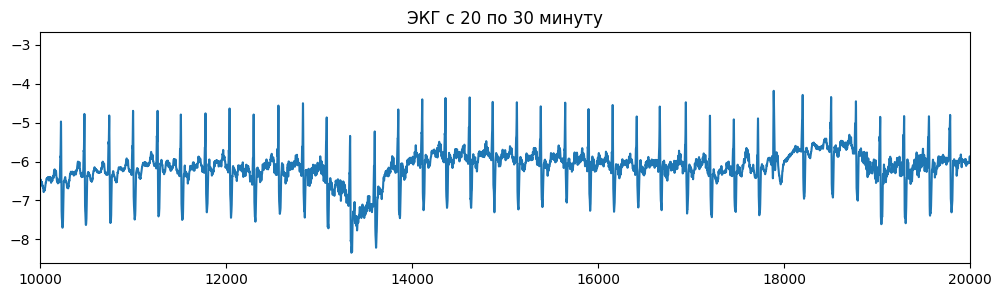

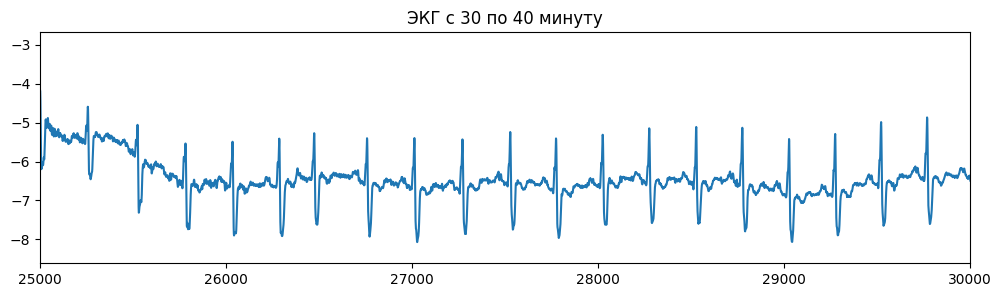

In [4]:
plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.title('Полученные данные ЭКГ')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(0, 5000)
plt.title('ЭКГ в первые 10 минут')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(10000, 20000)
plt.title('ЭКГ с 20 по 30 минуту')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(25000, 30000)
plt.title('ЭКГ с 30 по 40 минуту')
plt.show()

### Analysis

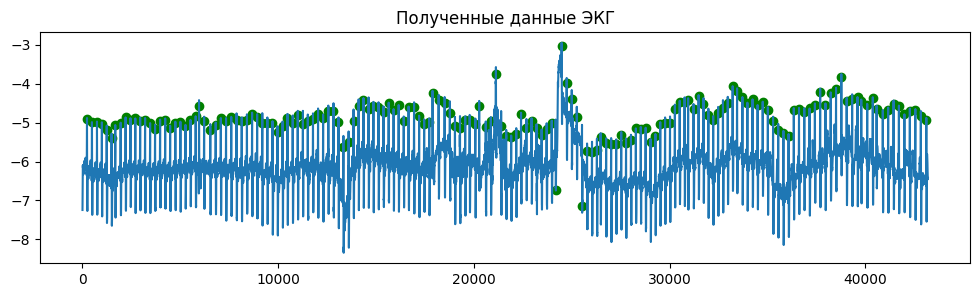

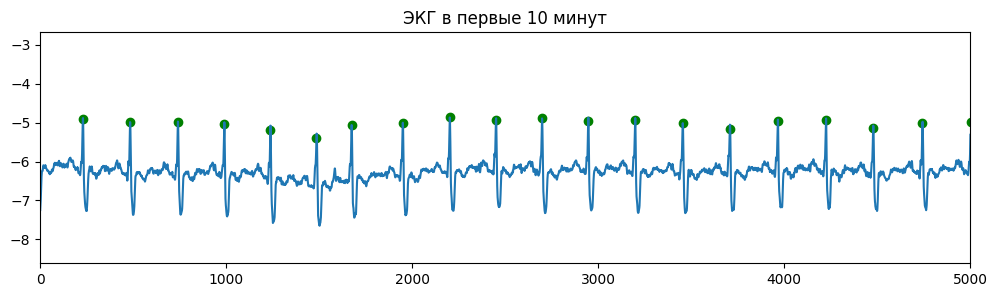

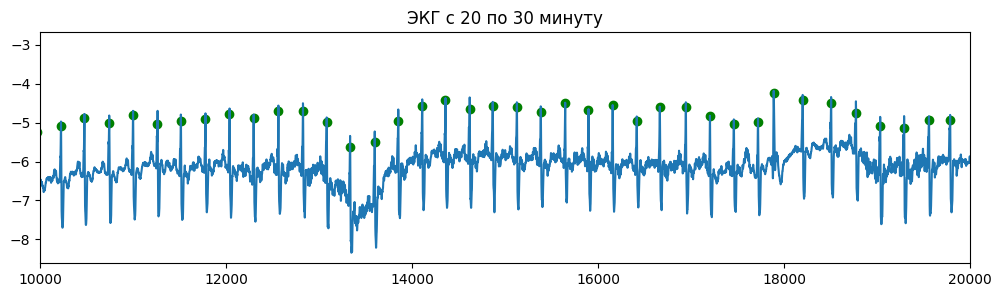

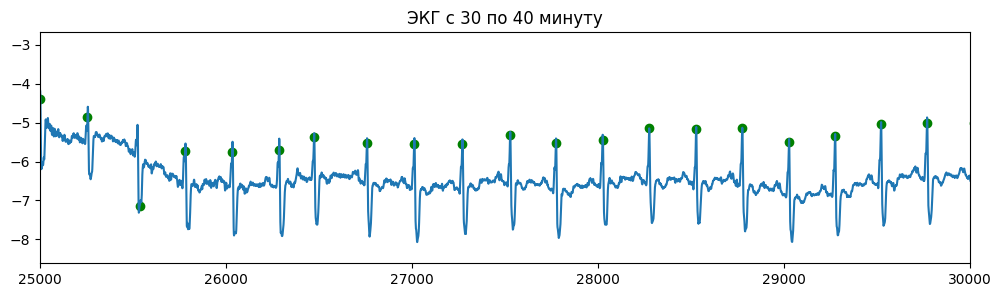

In [5]:
plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.title('Полученные данные ЭКГ')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.xlim(0, 5000)
plt.title('ЭКГ в первые 10 минут')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.xlim(10000, 20000)
plt.title('ЭКГ с 20 по 30 минуту')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.xlim(25000, 30000)
plt.title('ЭКГ с 30 по 40 минуту')
plt.show()

### Filtration

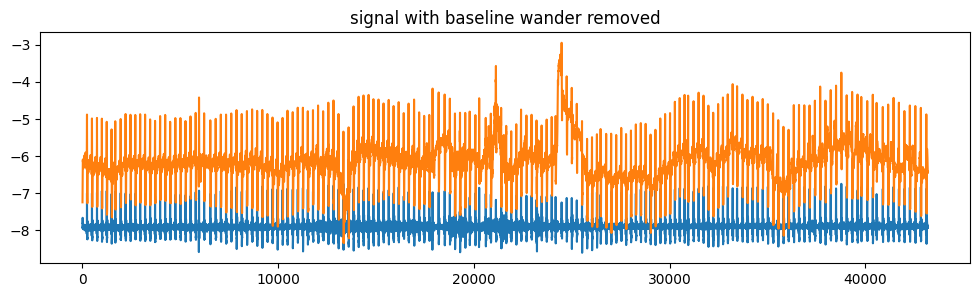

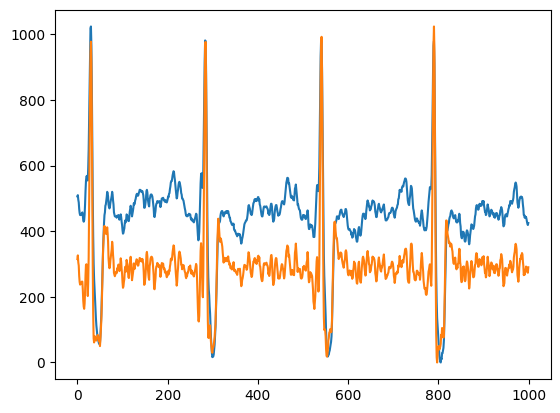

In [6]:
filtered = hp.remove_baseline_wander(dirtydata, sample_rate)

plt.figure(figsize=(12,3))
plt.title('signal with baseline wander removed')
plt.plot(filtered)
plt.plot(dirtydata)
plt.show()

plt.plot(hp.scale_data(dirtydata[200:1200]))
plt.plot(hp.scale_data(filtered[200:1200]))
plt.show()

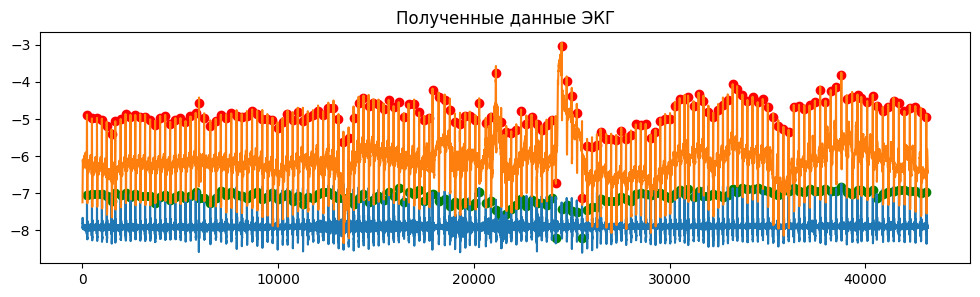

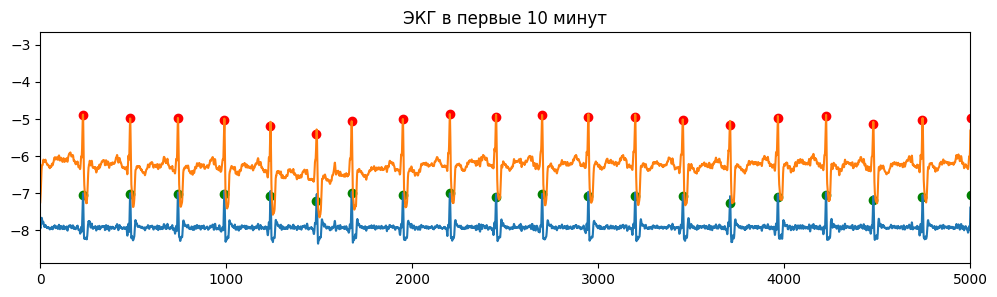

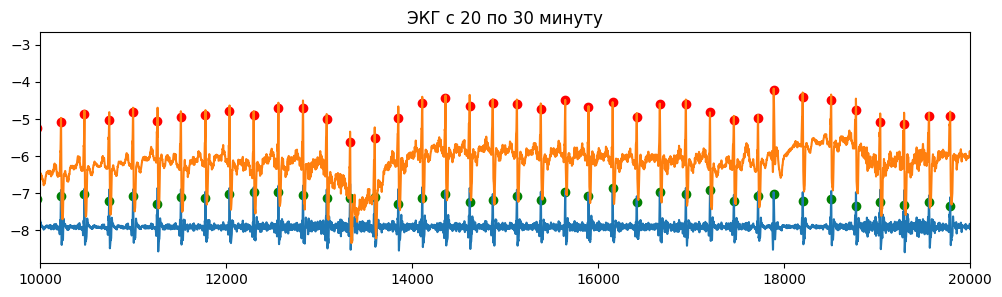

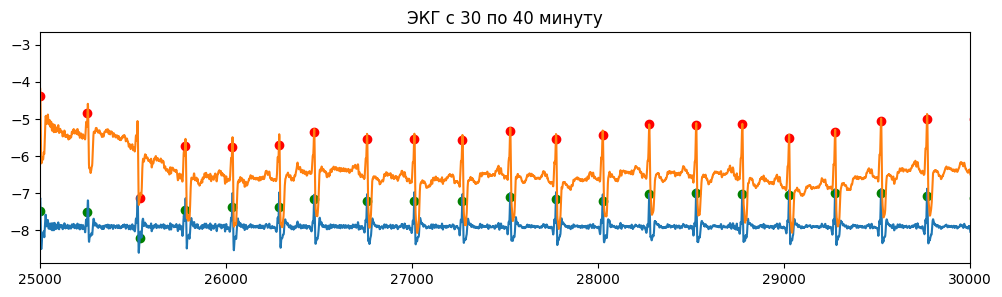

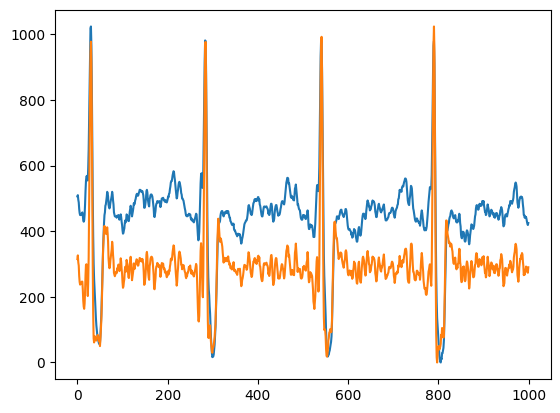

In [7]:
plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.title('Полученные данные ЭКГ')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(0, 5000)
plt.title('ЭКГ в первые 10 минут')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(10000, 20000)
plt.title('ЭКГ с 20 по 30 минуту')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(25000, 30000)
plt.title('ЭКГ с 30 по 40 минуту')
plt.show()



plt.plot(hp.scale_data(dirtydata[200:1200]))
plt.plot(hp.scale_data(filtered[200:1200]))

### R-R measure

## baevsky stress index

# Neurokit

In [3]:
nk.ecg_process('e0110.csv', sampling_rate=1000, method='neurokit')

ValueError: NeuroKit error: we expect the user to provide a vector, i.e., a one-dimensional array (such as a list of values). Current input of shape: ()

# Test samples

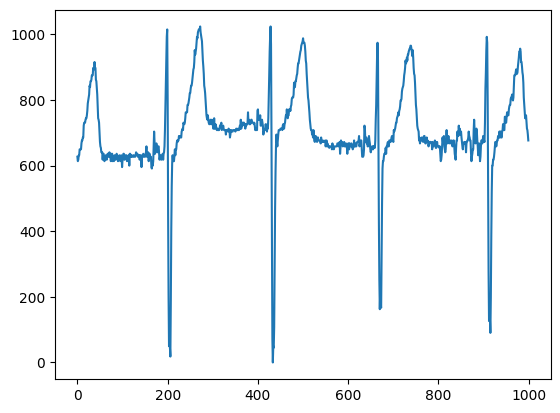

In [31]:
plt.plot(hp.scale_data(cleardata[200:1200]))
plt.show()

### Simple way

In [26]:
# # plt.figure(figsize=(12,4))
# # plt.plot(data)
# # plt.show()

# # #and zoom in a bit
# # plt.figure(figsize=(12,4))
# # plt.plot(data[0:2500])
# # plt.show()

# wd, m = hp.process(cleardata, sample_rate)

# #visualise in plot of custom size
# plt.figure(figsize=(12,4))
# hp.plotter(wd, m)

# #display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

### Function

In [27]:
# def load_visualise(data_file, annotations_file):
#     '''
#     loads data and annotations, plots them 
#     and returns data and annotations
#     '''
    
    
#     #load the data
#     ecg = hp.get_data(data_file)

#     #get the annotations
#     annotations = hp.get_data(annotations_file)
#     #explore signal
#     plt.figure(figsize=(12,3))
#     plt.plot(ecg)
#     plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
#     plt.show()

#     #and zoom in
#     plt.figure(figsize=(12,3))
#     plt.plot(ecg)
#     plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
#     plt.xlim(20000, 26000)
#     plt.show()
    
#     return ecg, annotations

# ecg, annotations = load_visualise('118e24.csv', '118e24_ann.csv')

## main analysis

### Clean signal

In [28]:
# filtered = hp.filter_signal(cleardata, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

# #run analysis
# wd, m = hp.process(hp.scale_data(cleardata), sample_rate)

# #display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

# #resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
# resampled_data = resample(cleardata, len(filtered) * 2)

# #And run the analysis again. Don't forget to up the sample rate as well!
# wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

# #visualise in plot of custom size
# plt.figure(figsize=(12,4))
# hp.plotter(wd, m)

# #display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

# hp.plot_poincare(wd, m)

# #print poincare measures
# poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
# print('\nnonlinear poincare measures:')
# for measure in poincare_measures:
#     print('%s: %f' %(measure, m[measure]))

### Dirty signal

In [ ]:
plt.plot(hp.scale_data(data[200:1200]))

# Prediction of signal behavior